In [65]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from keras.metrics import *
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf

In [66]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

KeyboardInterrupt: 

In [ ]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
print(y_train[0])

5


Text(0.5, 1.0, '5')

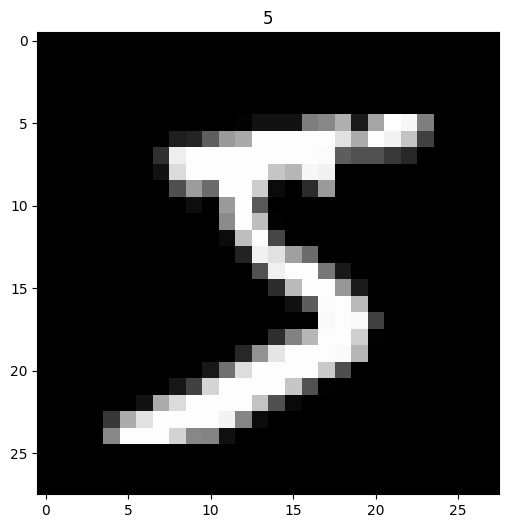

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title(str(y_train[0]))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train/=255
X_test/=255

In [ ]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
n_classes = np_utils.to_categorical(y_train, 10)

In [ ]:
print(n_classes)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
print(y_train[0])

5


In [ ]:
print(n_classes[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
n_classes_test = np_utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 input_shape = (28, 28, 1),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       147712    
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         590080    
                                                                 
 batch_normalization_1 (Batc  (None, 9, 9, 256)        1

In [ ]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                              name = 'specificity'),
           Recall(name='recall')]

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = METRICS)

In [ ]:
train_generator = ImageDataGenerator(rotation_range = 7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)
test_generator = ImageDataGenerator()

In [ ]:
X_train = train_generator.flow(X_train,
                               n_classes,
                               batch_size = 128)

X_test = test_generator.flow(X_test,
                             n_classes_test,
                             batch_size = 128)

In [ ]:
hist = model.fit(X_train,
                          steps_per_epoch = 60000/128,
                          epochs = 100,
                          validation_data = X_test,
                          validation_steps = 10000/128)

Epoch 1/100
468/468 [==============================] - 316s 668ms/step - loss: 0.3046 - accuracy: 0.9072 - tp: 53230.0000 - tn: 536189.0000 - fp: 3811.0000 - fn: 6770.0000 - precision: 0.9959 - sensitivity: 0.9931 - specificity: 0.9997 - recall: 0.8872 - val_loss: 0.2638 - val_accuracy: 0.9216 - val_tp: 9095.0000 - val_tn: 89399.0000 - val_fp: 601.0000 - val_fn: 905.0000 - val_precision: 0.9969 - val_sensitivity: 0.9919 - val_specificity: 0.9998 - val_recall: 0.9095
Epoch 2/100
468/468 [==============================] - 307s 654ms/step - loss: 0.1215 - accuracy: 0.9625 - tp: 57485.0000 - tn: 538087.0000 - fp: 1913.0000 - fn: 2515.0000 - precision: 0.9982 - sensitivity: 0.9967 - specificity: 0.9999 - recall: 0.9581 - val_loss: 0.0789 - val_accuracy: 0.9749 - val_tp: 9723.0000 - val_tn: 89780.0000 - val_fp: 220.0000 - val_fn: 277.0000 - val_precision: 0.9992 - val_sensitivity: 0.9979 - val_specificity: 0.9999 - val_recall: 0.9723
Epoch 3/100
468/468 [==============================] - 255

In [67]:
acc = hist.history['accuracy']
loss = hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv= hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history["recall"][-1]
RECV = hist.history["val_recall"][-1]

In [68]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

OACC = (TP+TN)/(TP+FP+FN+TN)
ACCCM = (TP+TN)/(TN + TP + FP + FN)
FM = (2 * PRE * REC)/(PRE + REC)
F1S = 2*((PRE*REC))/(PRE+REC)
F1S2 = 2 * TP/(2 * TP + FP + FN)

In [69]:
print(f'Verdadeiros positivos" {tp}')
print(f'Falsos positivos" {fp}')
print(f'Verdadeiros Negativos" {tn}')
print(f'Falsos negativos" {fn}')

print('-------------------------------------')
print("Matriz de confusão")
print(f"[{TP}]] [{FP}]")
print(f"[{FN}]] [{TN}]")
print('-------------------------------------')
print(f'Acuracia da Matriz Confusao {round(ACCCM, 2)*100-2}%')

Verdadeiros positivos" [53230.0, 57485.0, 58114.0, 58283.0, 58518.0, 58638.0, 58783.0, 58834.0, 58891.0, 58944.0, 58976.0, 59004.0, 59021.0, 59071.0, 59128.0, 59231.0, 59086.0, 59183.0, 59212.0, 59244.0, 59250.0, 59217.0, 59307.0, 59280.0, 59322.0, 59303.0, 59383.0, 59333.0, 59343.0, 59383.0, 59414.0, 59428.0, 59413.0, 59459.0, 59412.0, 59418.0, 59421.0, 59438.0, 59447.0, 59485.0, 59481.0, 59489.0, 59450.0, 59486.0, 59542.0, 59536.0, 59492.0, 59554.0, 59545.0, 59513.0, 59530.0, 59518.0, 59539.0, 59616.0, 59546.0, 59590.0, 59586.0, 59595.0, 59565.0, 59580.0, 59600.0, 59588.0, 59586.0, 59602.0, 59643.0, 59605.0, 59619.0, 59663.0, 59611.0, 59605.0, 59632.0, 59638.0, 59641.0, 59638.0, 59644.0, 59637.0, 59619.0, 59620.0, 59639.0, 59655.0, 59615.0, 59649.0, 59690.0, 59633.0, 59654.0, 59650.0, 59678.0, 59672.0, 59663.0, 59701.0, 59691.0, 59675.0, 59644.0, 59701.0, 59687.0, 59681.0, 59675.0, 59701.0, 59700.0, 59667.0]
Falsos positivos" [3811.0, 1913.0, 1412.0, 1337.0, 1149.0, 1042.0, 960.0, 92

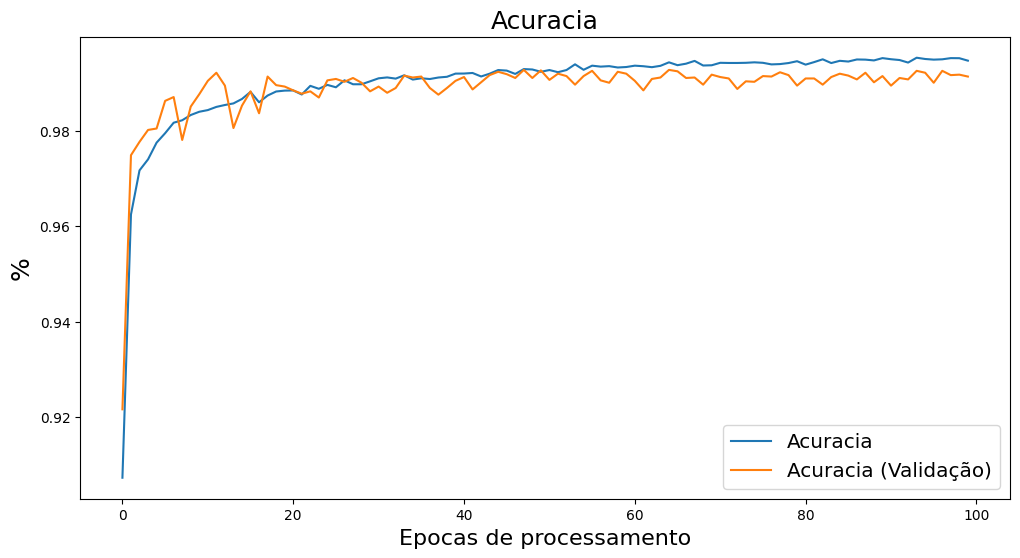

In [70]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
           'Acuracia (Validação)'],
          loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel("%", fontsize = 18)
plt.title('Acuracia', fontsize = 18)
plt.show()

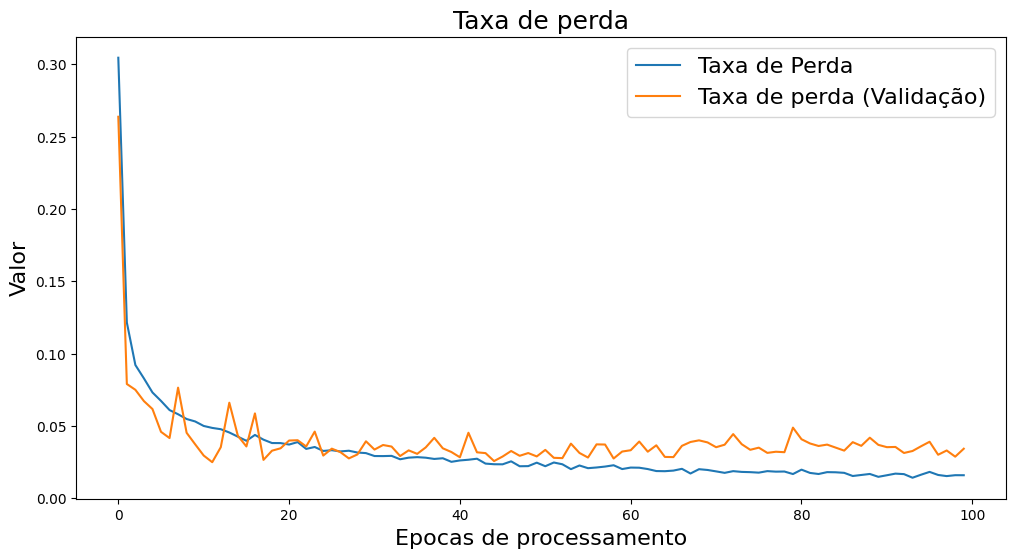

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
           'Taxa de perda (Validação)'],
          loc = 'upper right', fontsize = 16)
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de perda', fontsize = 18)
plt.show()

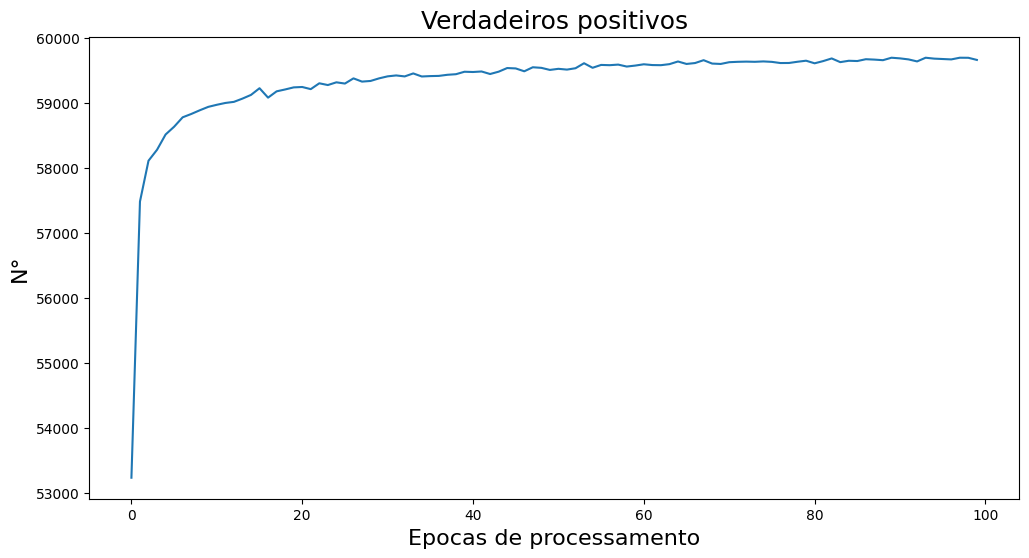

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros positivos', fontsize = 18)
plt.show()

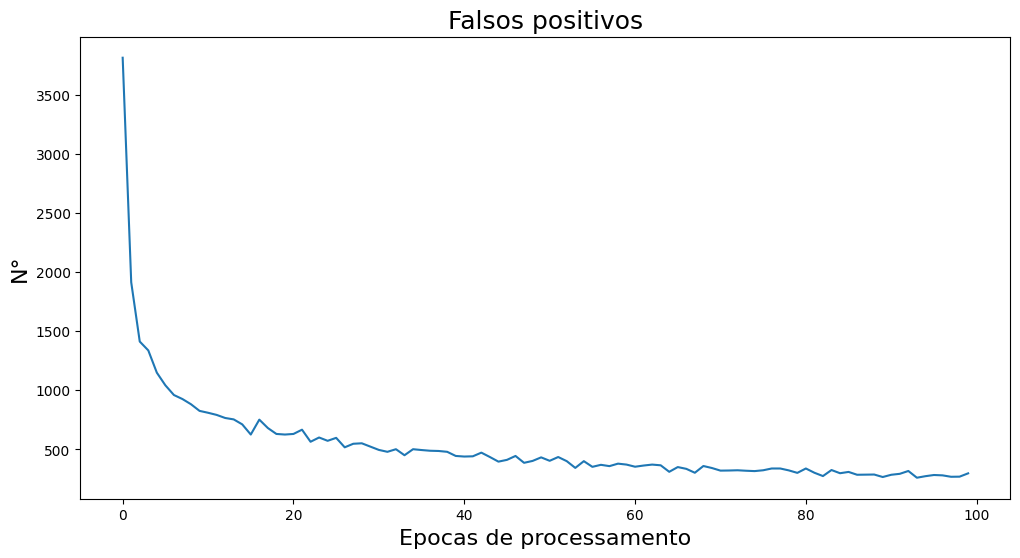

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos positivos', fontsize = 18)
plt.show()

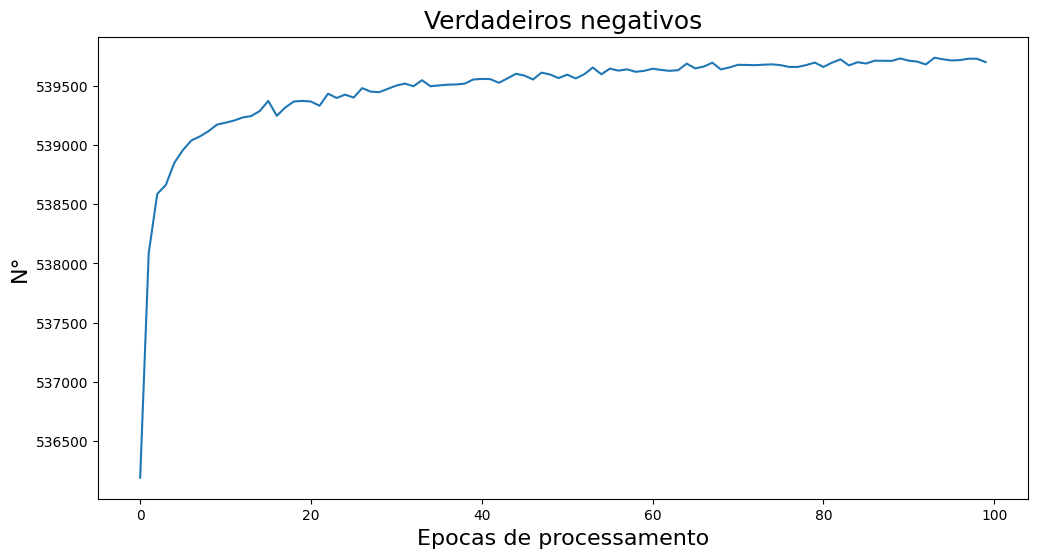

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Verdadeiros negativos', fontsize = 18)
plt.show()

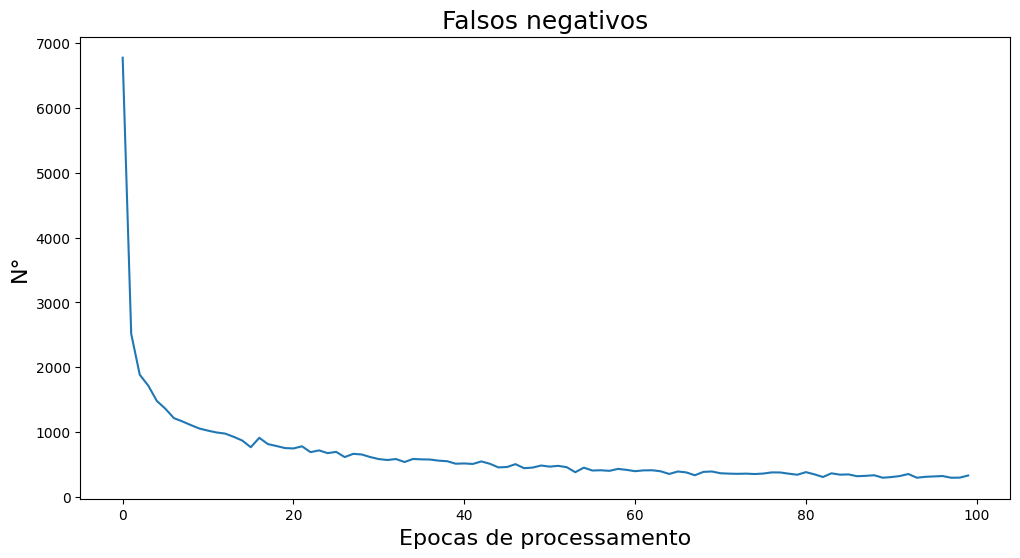

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Falsos negativos', fontsize = 18)
plt.show()

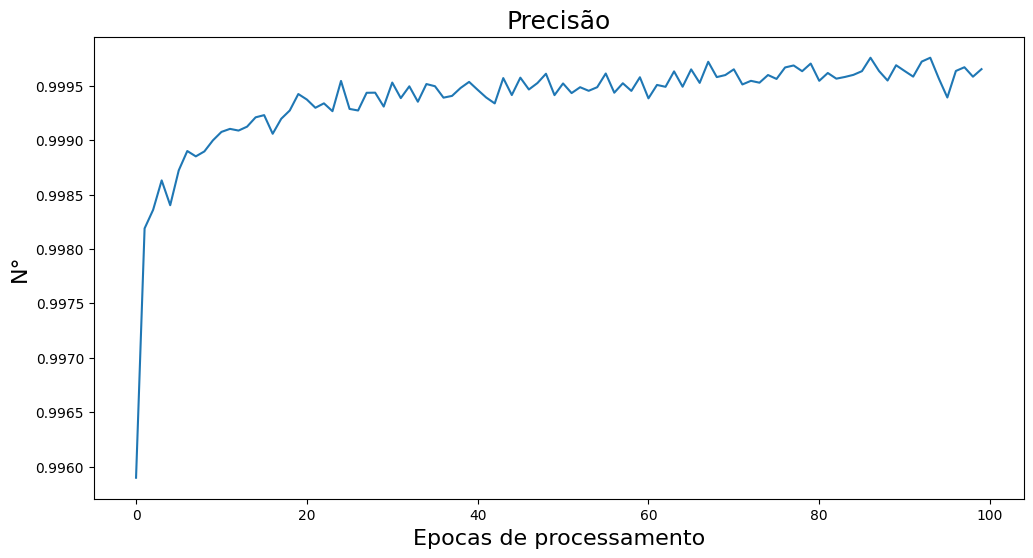

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()

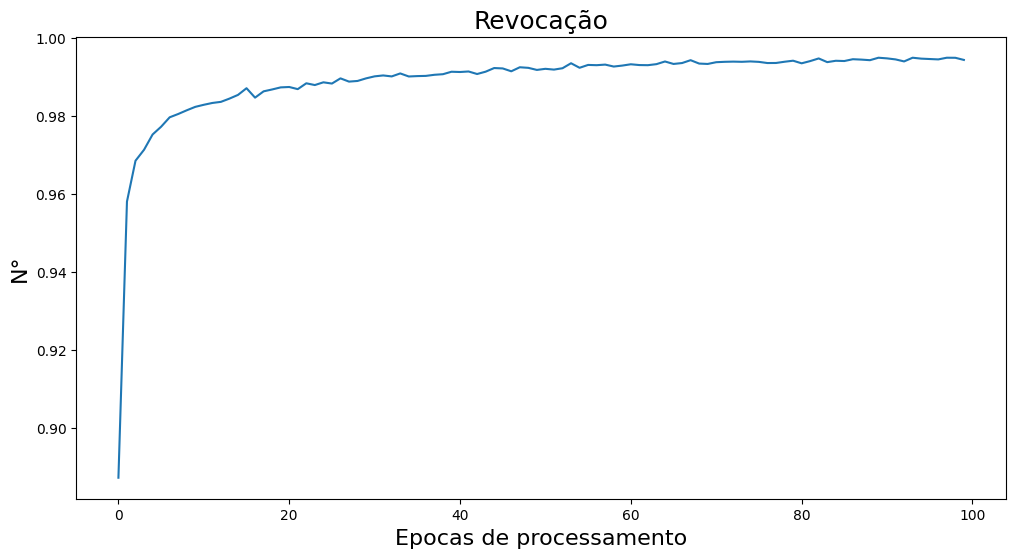

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('N°', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Numeros de Positivos e Negativos')

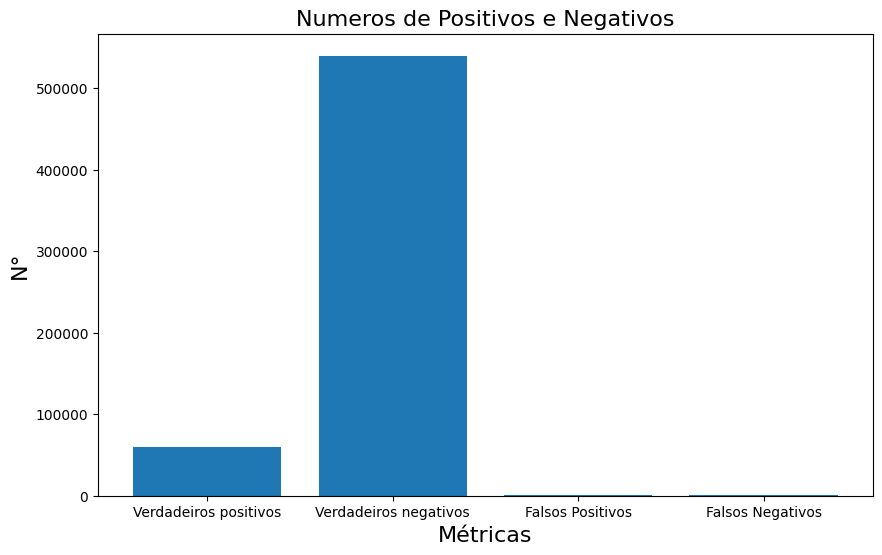

In [ ]:
data = {'Verdadeiros positivos': TP,
        'Verdadeiros negativos': TN,
        'Falsos Positivos': FP,
        'Falsos Negativos': FN}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("N°", fontsize = 16)
plt.title("Numeros de Positivos e Negativos", fontsize = 16)

Text(0.5, 1.0, 'Numeros de Positivos e Negativos em %')

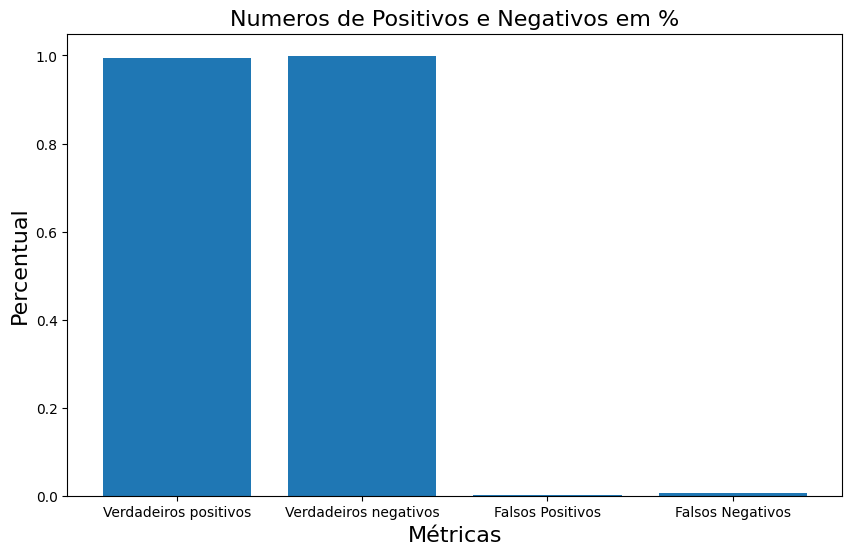

In [ ]:
data = {'Verdadeiros positivos': TPR,
        'Verdadeiros negativos': TNR,
        'Falsos Positivos': FPR,
        'Falsos Negativos': FNR}
modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10,6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title("Numeros de Positivos e Negativos em %", fontsize = 16)

In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]
acc_final = hist.history['accuracy'][-1] * 100

In [72]:
accU10 = np.mean(acc[-10])
tpU10 = np.mean(tp[-10])
fpU10 = np.mean(fp[-10])
tnU10 = np.mean(tn[-10])
fnU10 = np.mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

Verdadeiros Positivos: 59691.0
Falsos Positivos: 286.0
Verdadeiros Negativos: 539714.0
Falsos Negativos: 309.0


In [73]:
print('RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)')
print('--------------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acuracia Geral: {round(OACC, 2)*100-2}%')
print(f'Acuracia Media (Media ultimas 10 epocas): {round(accU10, 2)*100-2}%')
print(f'Acuracia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acuracia (Validação): {round(ACCV, 2)*100-2}%')
print(f'Taxa de perda: {round(LOSS, 2)}%')
print(f'Taxa de perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisao: {round(PRE, 2)*100-2}%')
print(f'Precisao (Validação): {round(OACC, 2)*100-2}%')
print(f'Revocação: {round(REC, 2)*100-2}%')
print(f'Revocação (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100-2}%')
print(f'F-Score: {round(FM, 2)*100-2}%')
print(f'F1 Score(VP, FP, VN, FN): {round(F1S2, 2)*100-2}%')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acuracia da Matriz Confusao: {round(ACCCM, 2)*100}%')
print(f'Taxa de verdadeiros positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros negativos: {round(NPV, 2)*100}%')
print(f'Taxa de falsos positivos: {round(FPR, 2)*100}%')
print(f'Taxa de falsos negativos: {round(FNR, 2)*100}%')
print(f'Dados Invalidos: {round(FDR, 2)*100}%')

RELATORIO FINAL (METRICAS DE AUTOAVALIACAO)
--------------------------------------------
Acuracia Final: 97.47%
Acuracia Geral: 98.0%
Acuracia Media (Media ultimas 10 epocas): 98.0%
Acuracia (Treinamento): 97.0%
Acuracia (Validação): 97.0%
Taxa de perda: 0.02%
Taxa de perda (Validação): 0.03%
Precisao: 98.0%
Precisao (Validação): 98.0%
Revocação: 97.0%
Revocação (Validação): 97.0%
F1 Score: 98.0%
F-Score: 98.0%
F1 Score(VP, FP, VN, FN): 97.0%
Sensibilidade: 97.0%
Especificidade: 98.0%
Acuracia da Matriz Confusao: 100.0%
Taxa de verdadeiros positivos: 100.0%
Taxa de Verdadeiros negativos: 100.0%
Taxa de falsos positivos: 0.0%
Taxa de falsos negativos: 1.0%
Dados Invalidos: 0.0%


In [85]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


In [83]:
prediction = model.predict(X_test[:10])
print(prediction)

1/1 [==============================] - 0s 118ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [86]:
model.save('./convolutional.h5')
model.save_weights('./convolutional_weights.h5')